In [3]:
import threading
import time
import datetime

import shutil

import pyautogui

from pynput.keyboard import Key, Listener
from pynput import mouse 
import logging
import os


def capture_screenshot(out_dir, key):
    # Capture the screenshot
    screenshot = pyautogui.screenshot()

    output_file = f"{out_dir}/screenshot_{key}.png"
    # Save the screenshot
    screenshot.save(output_file)
    return output_file

In [4]:
from pynput.mouse import Button, Controller
import time

mouse = Controller()

from pynput import keyboard

from pynput.keyboard import Key

# Create a keyboard controller instance
keyboard = keyboard.Controller()
res = "<mouse>on_click(984,729,Button.left,True) <mouse>on_click(984,729,Button.left,False) some text"
#res = "some text"

mouse_tag = "<mouse>"
mouse_on_click_tag = "on_click"

key_tag = "Key."


def emit_key(key):
    key_map = {"space" : Key.space,
               "up" : Key.up,
               "down" : Key.down,
               "left" : Key.left,
               "right" : Key.right,
               "enter" : Key.enter,
               "alt_l" : Key.alt_l,
               "alt_r" : Key.alt_r,
               "tab" : Key.tab,
               "cmd" : Key.cmd,
               "shift" : Key.shift,
               "shift_l" : Key.shift_l,
               "shift_r" : Key.shift_r,
               "backspace" : Key.backspace}
    
    if key in key_map:
        key_obj = key_map[key]
        keyboard.press(key_obj)
        keyboard.release(key_obj)
        print("Emitted key: ", key_obj)
    else:
        print("Unknown key:", key)

def emit_text(text):
    print("text:", text)
    keyboard.type(text)
    # for i in range(len(text)):
    #     keyboard.press(text[i])
    #     keyboard.release(text[i])


def emit_mouse_click(x,y,button,pressed):
    mouse.move(x, y)
    mouse_fun = mouse.press if pressed=='True' else mouse.release
    button = Button.left if button == "Button.left" else Button.right
    mouse_fun(button)
    print("Emitted mouse click: ",x,y,button,pressed, mouse_fun)

def process_mouse_tag(part):
    part = part[len(mouse_tag):]
    if part.startswith(mouse_on_click_tag):
        part = part[len(mouse_on_click_tag)+1:-1]
        params = part.split(",")
        emit_mouse_click(int(params[0]), int(params[1]), params[2], params[3])
        
def process_slm_response(s):
    parts = s.split(" ")
    for part in parts:
        if part.startswith(mouse_tag):
            process_mouse_tag(part)
        elif part.startswith(key_tag):
            emit_key(part[len(key_tag):])
        else:
            emit_text(part)



In [5]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

def test_slm(image_url = "https://raw.githubusercontent.com/ambianic/fall-detection/main/fall_dataset/fall/74.jpg",
                prompt = "What should be the next git command?"):



    # Request data goes here
    # The example below assumes JSON formatting which may be updated
    # depending on the format your endpoint expects.
    # More information can be found here:
    # https://docs.microsoft.com/azure/machine-learning/how-to-deploy-advanced-entry-script
    data = {
            "prompt" : f"<|user|>\n<|image_1|>{prompt}<|end|><|assistant|>\n",
            "image_url" : image_url
        }

    body = str.encode(json.dumps(data))

    url = 'https://finetunedphi3endpointfin.northeurope.inference.ml.azure.com/score'
    # Replace this with the primary/secondary key, AMLToken, or Microsoft Entra ID token for the endpoint
    api_key = 'kgFJl7af3C6RadFJRKDNyWVm2HltUbeu'
    if not api_key:
        raise Exception("A key should be provided to invoke the endpoint")

    # The azureml-model-deployment header will force the request to go to a specific deployment.
    # Remove this header to have the request observe the endpoint traffic rules
    headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key), 'azureml-model-deployment': 'blue' }

    req = urllib.request.Request(url, body, headers)

    try:
        response = urllib.request.urlopen(req)

        result = response.read()
        print(result)
        return result
    except urllib.error.HTTPError as error:
        print("The request failed with status code: " + str(error.code))

        # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
        print(error.info())
        print(error.read().decode("utf8", 'ignore'))


test_slm()

b'[{"0": "\\\\<git>pull"}]'


b'[{"0": "\\\\<git>pull"}]'


b'[{"0": "\\\\<key>Key.alt_l  <key>Key.tab"}]'
res_js:: <key>Key.alt_l  <key>Key.tab
text: <key>Key.alt_l
text: 
text: <key>Key.tab

b'[{"0": "\\\\<mouse>on_click(1276,1016,Button.left,True) <mouse>on_click(1276,1016,Button.left,False)"}]'
res_js:: <mouse>on_click(1276,1016,Button.left,True) <mouse>on_click(1276,1016,Button.left,False)
Emitted mouse click:  1276 1016 Button.left True <bound method Controller.press of <pynput.mouse._win32.Controller object at 0x0000020B05283B08>>
Emitted mouse click:  1276 1016 Button.left False <bound method Controller.release of <pynput.mouse._win32.Controller object at 0x0000020B05283B08>>

b'[{"0": "\\\\<key>Key.alt_l  <key>Key.tab"}]'
res_js:: <key>Key.alt_l  <key>Key.tab
text: <key>Key.alt_l
text: 
text: <key>Key.tab

b'[{"0": "\\\\<key>Key.alt_l  <key>Key.tab"}]'
res_js:: <key>Key.alt_l  <key>Key.tab
text: <key>Key.alt_l
text: 
text: <key>Key.tab

b'[{"0": "\\\\<key>Key.alt_l  <key>Key.tab"}]'
res_js:: <key>Key.alt_l  <key>Key.tab
text: <key>Key
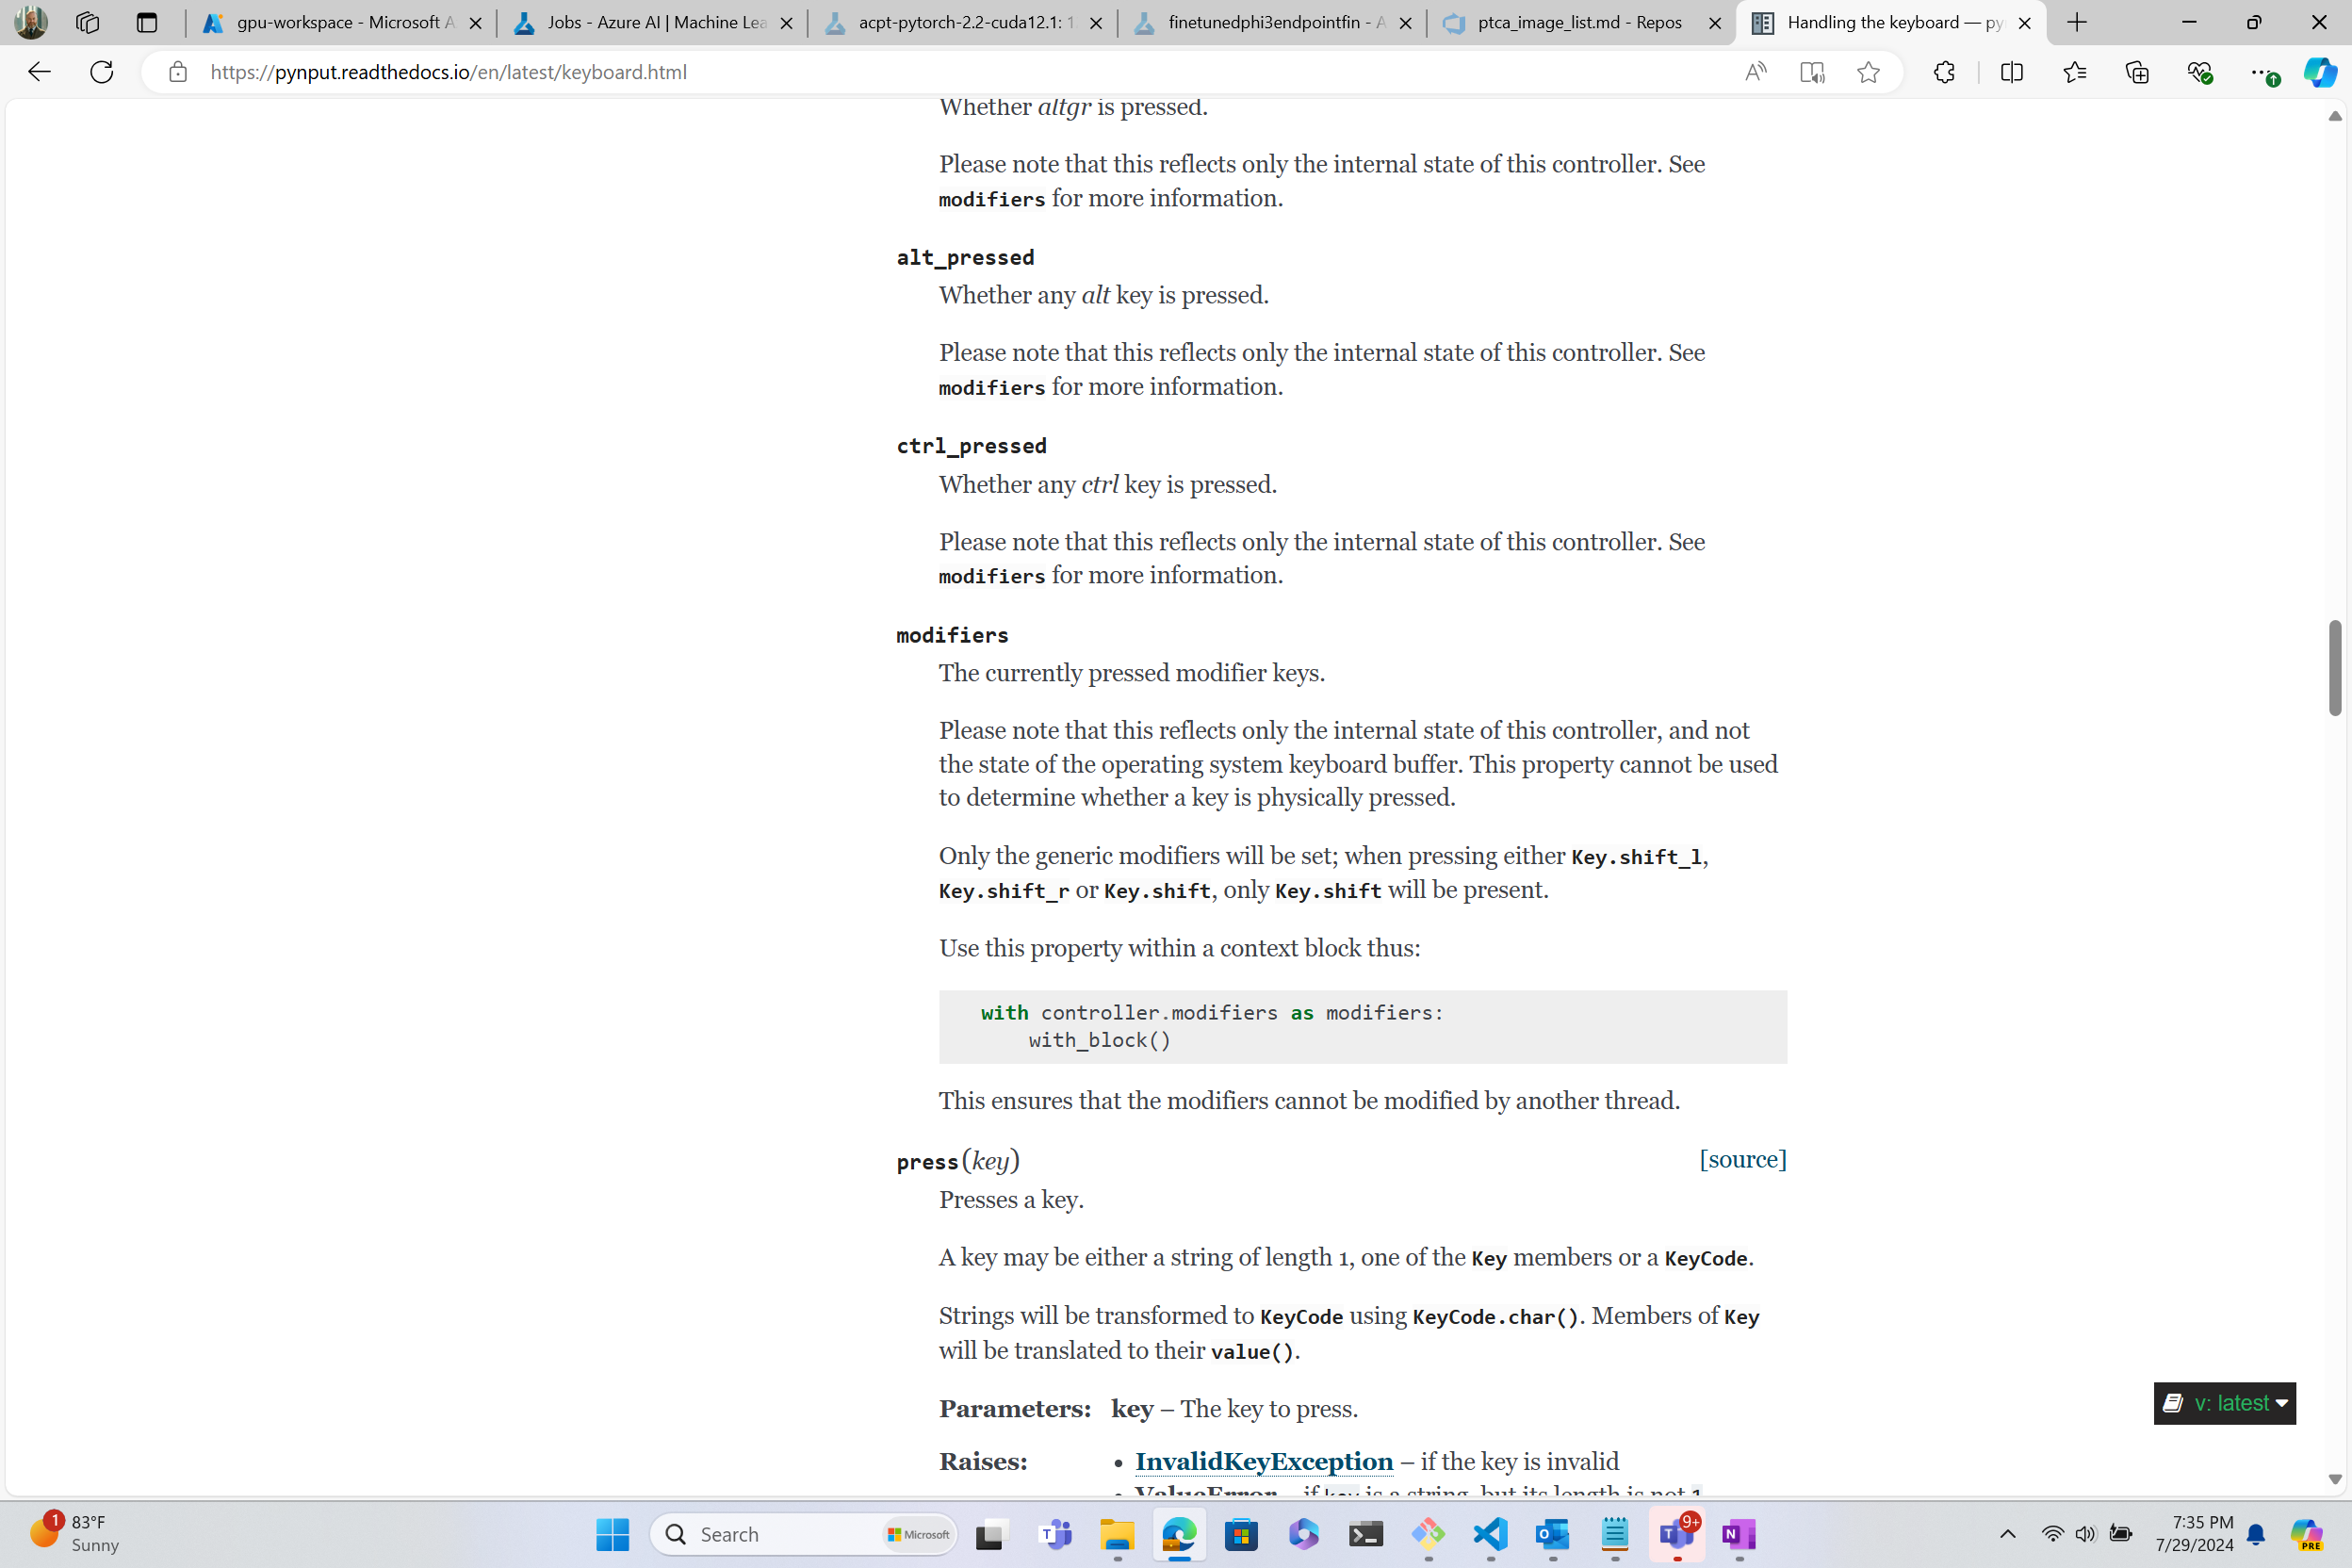
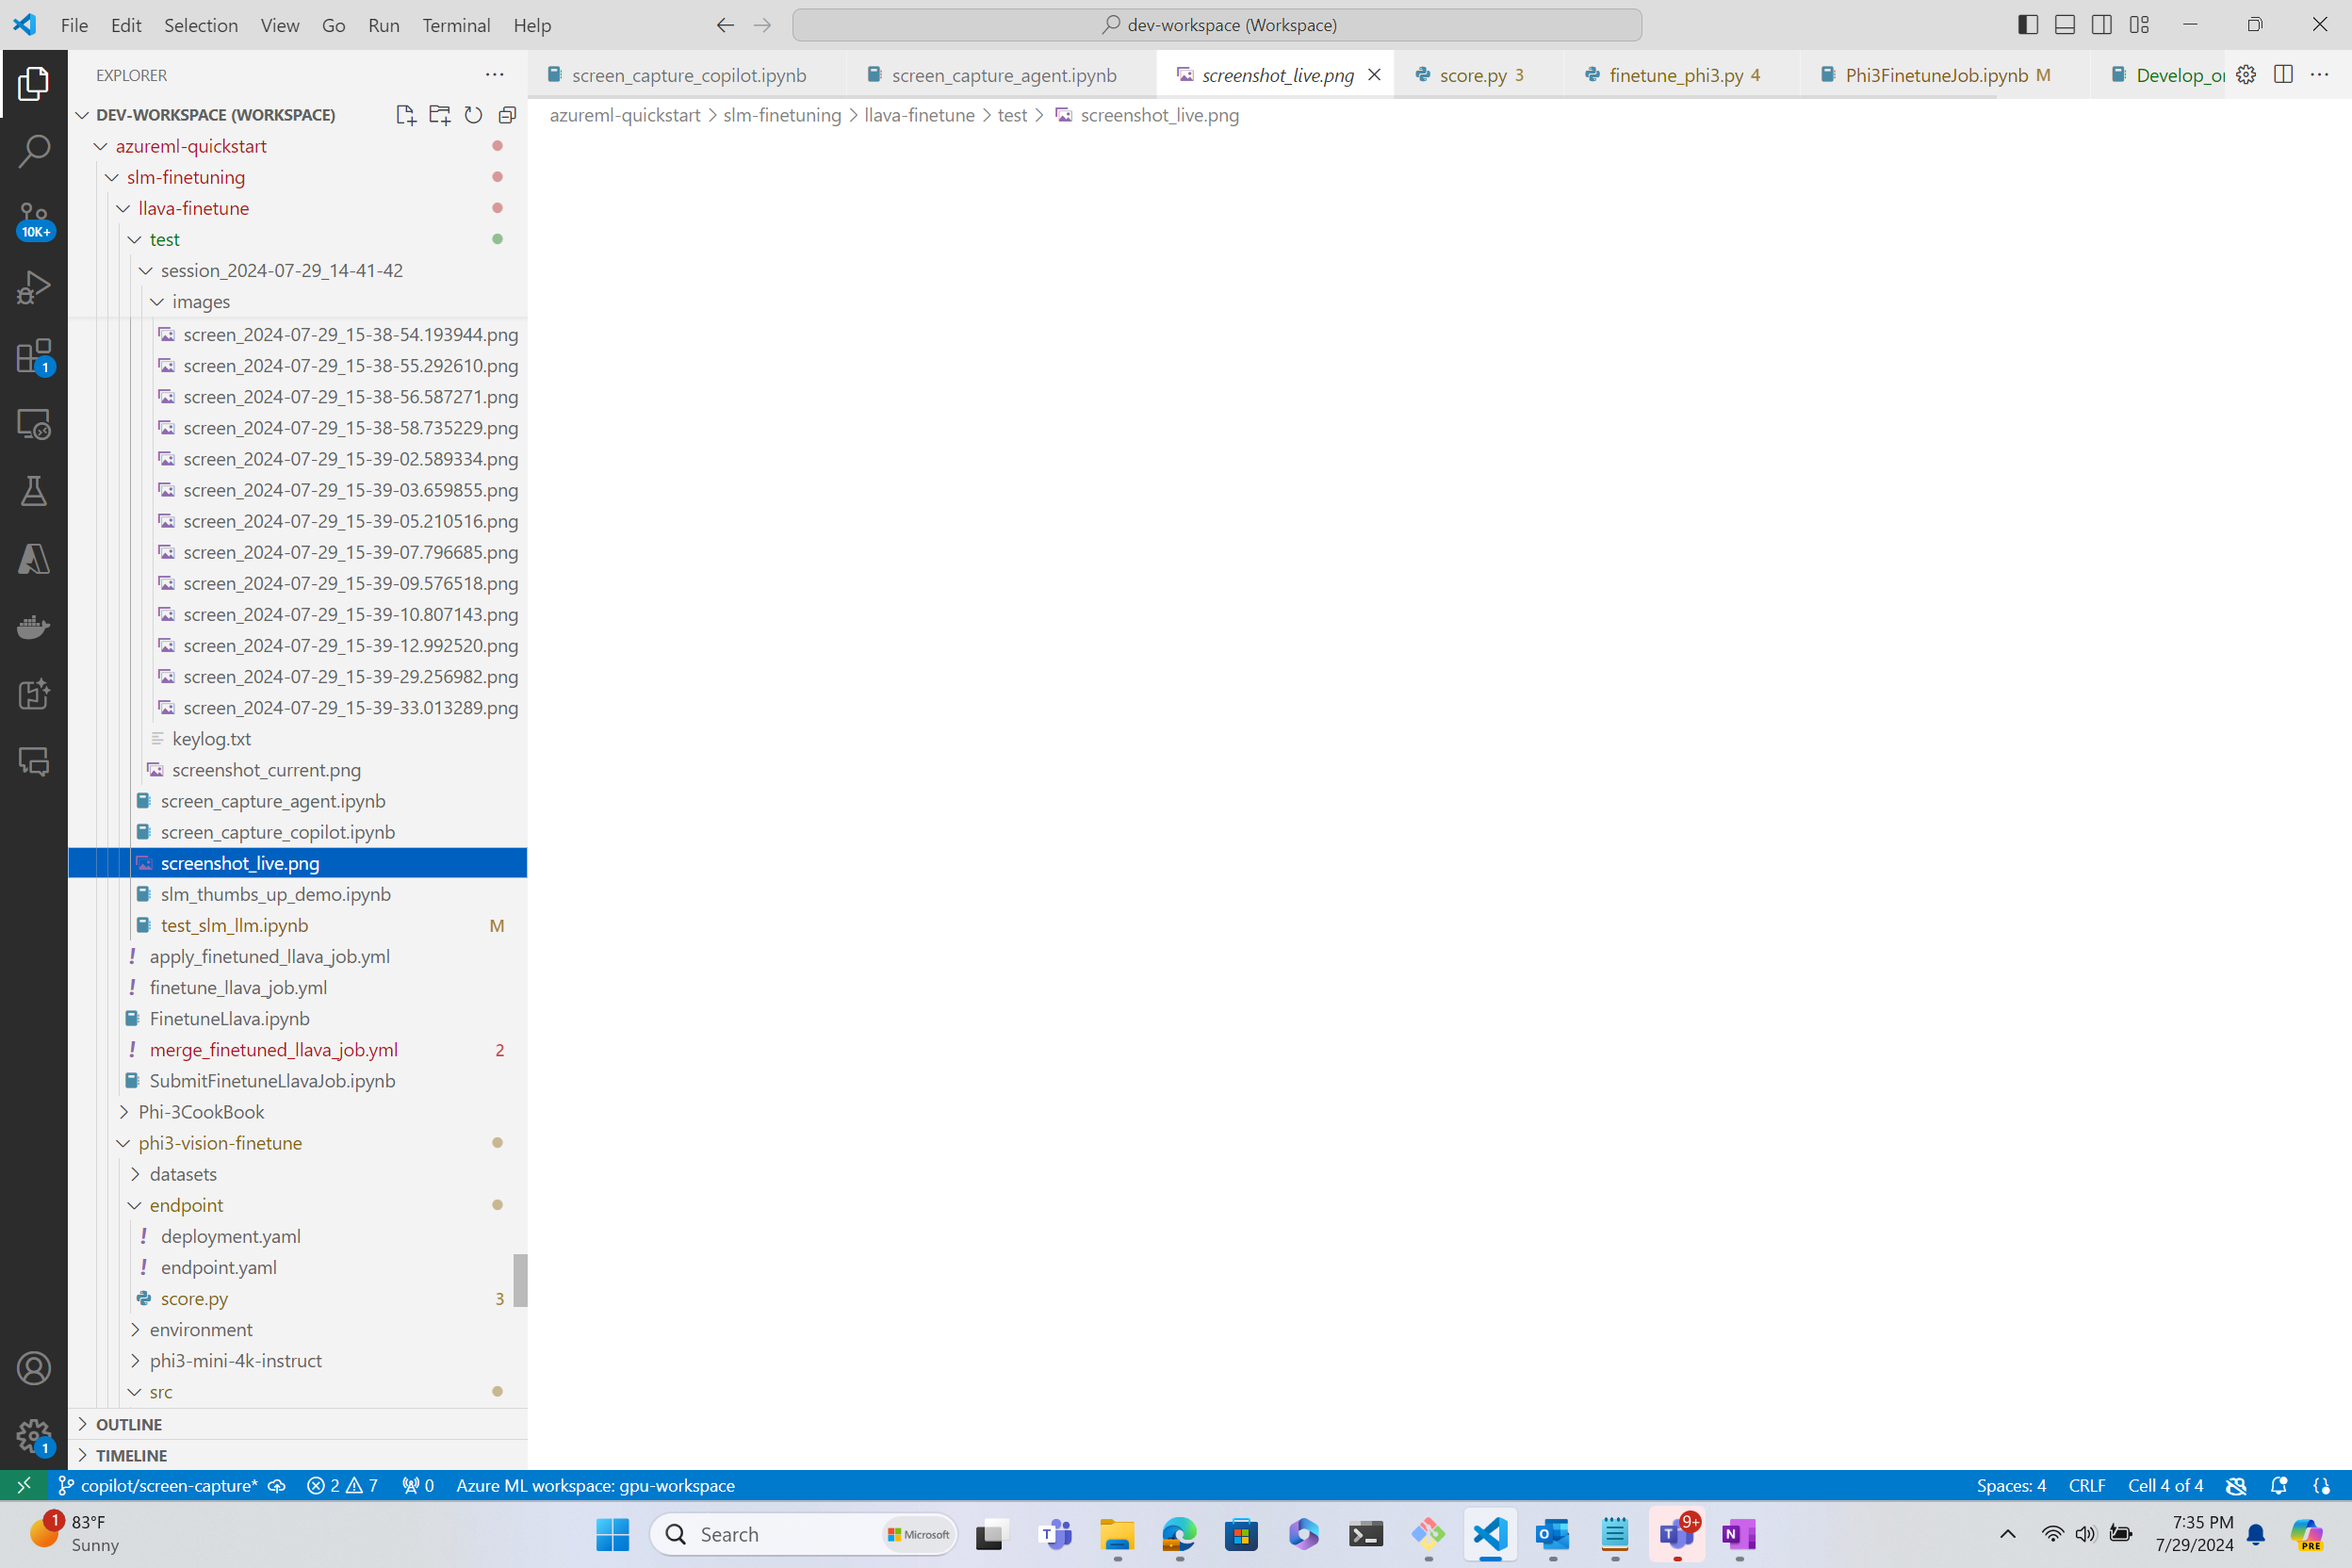
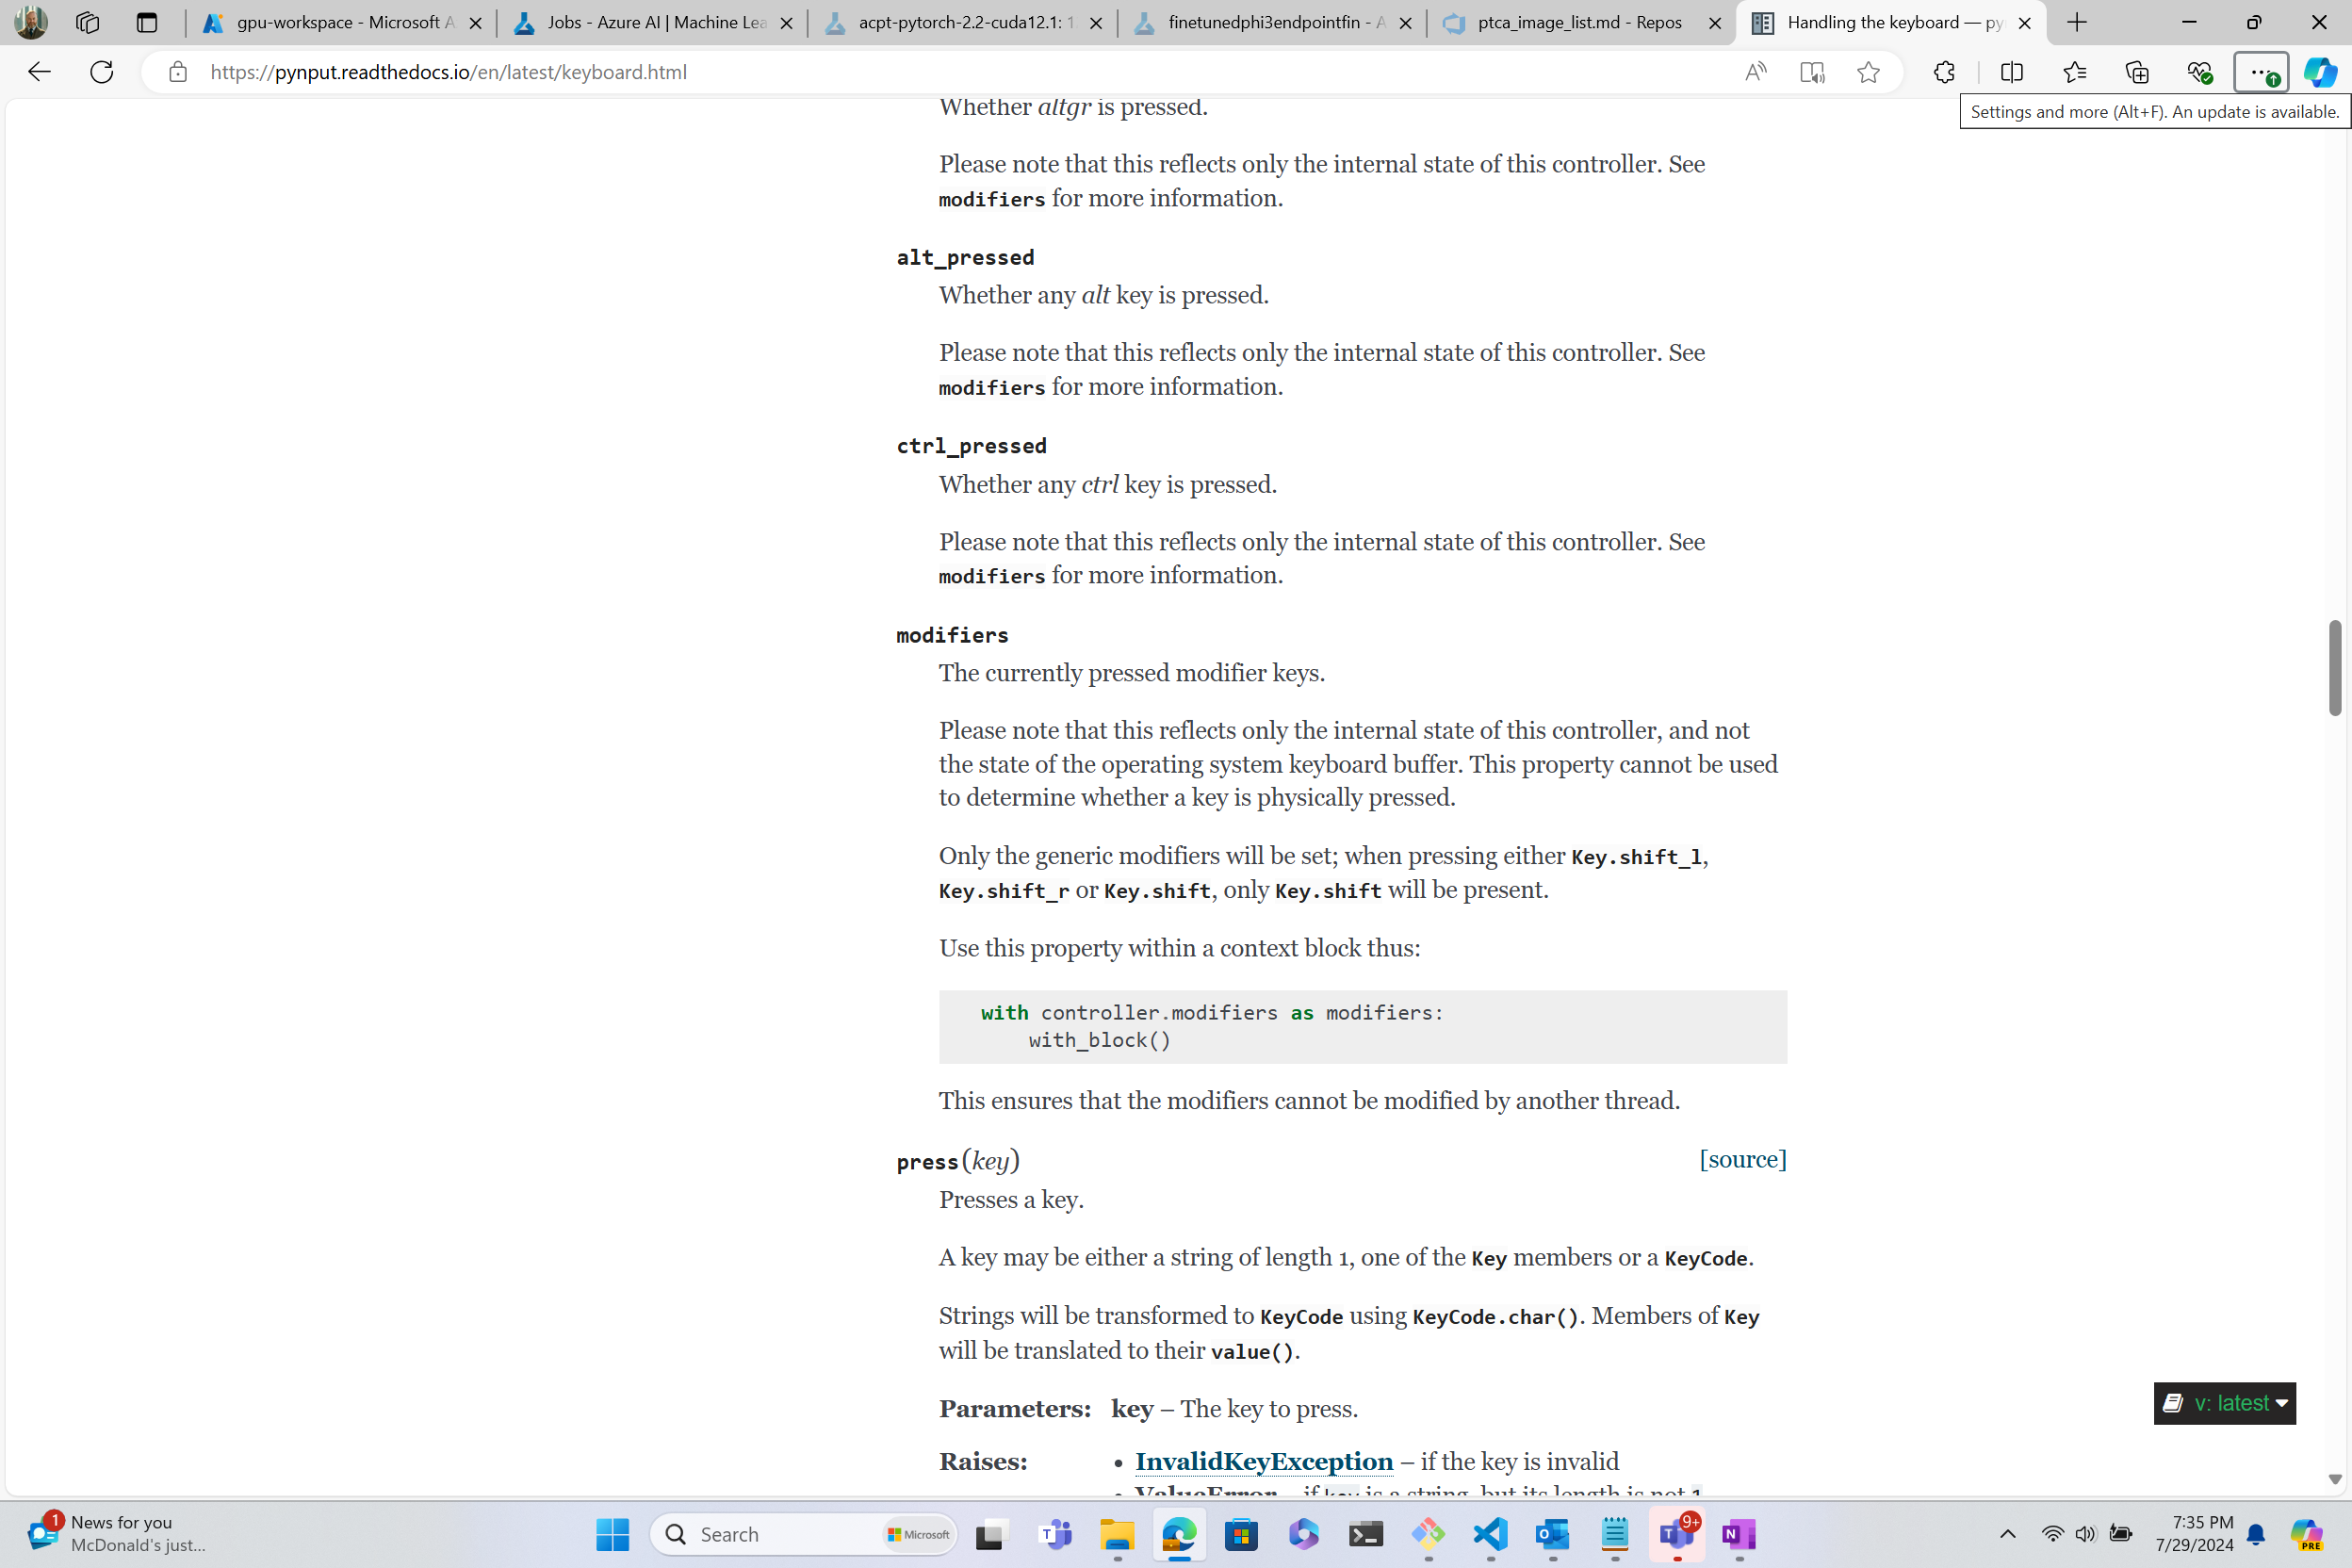
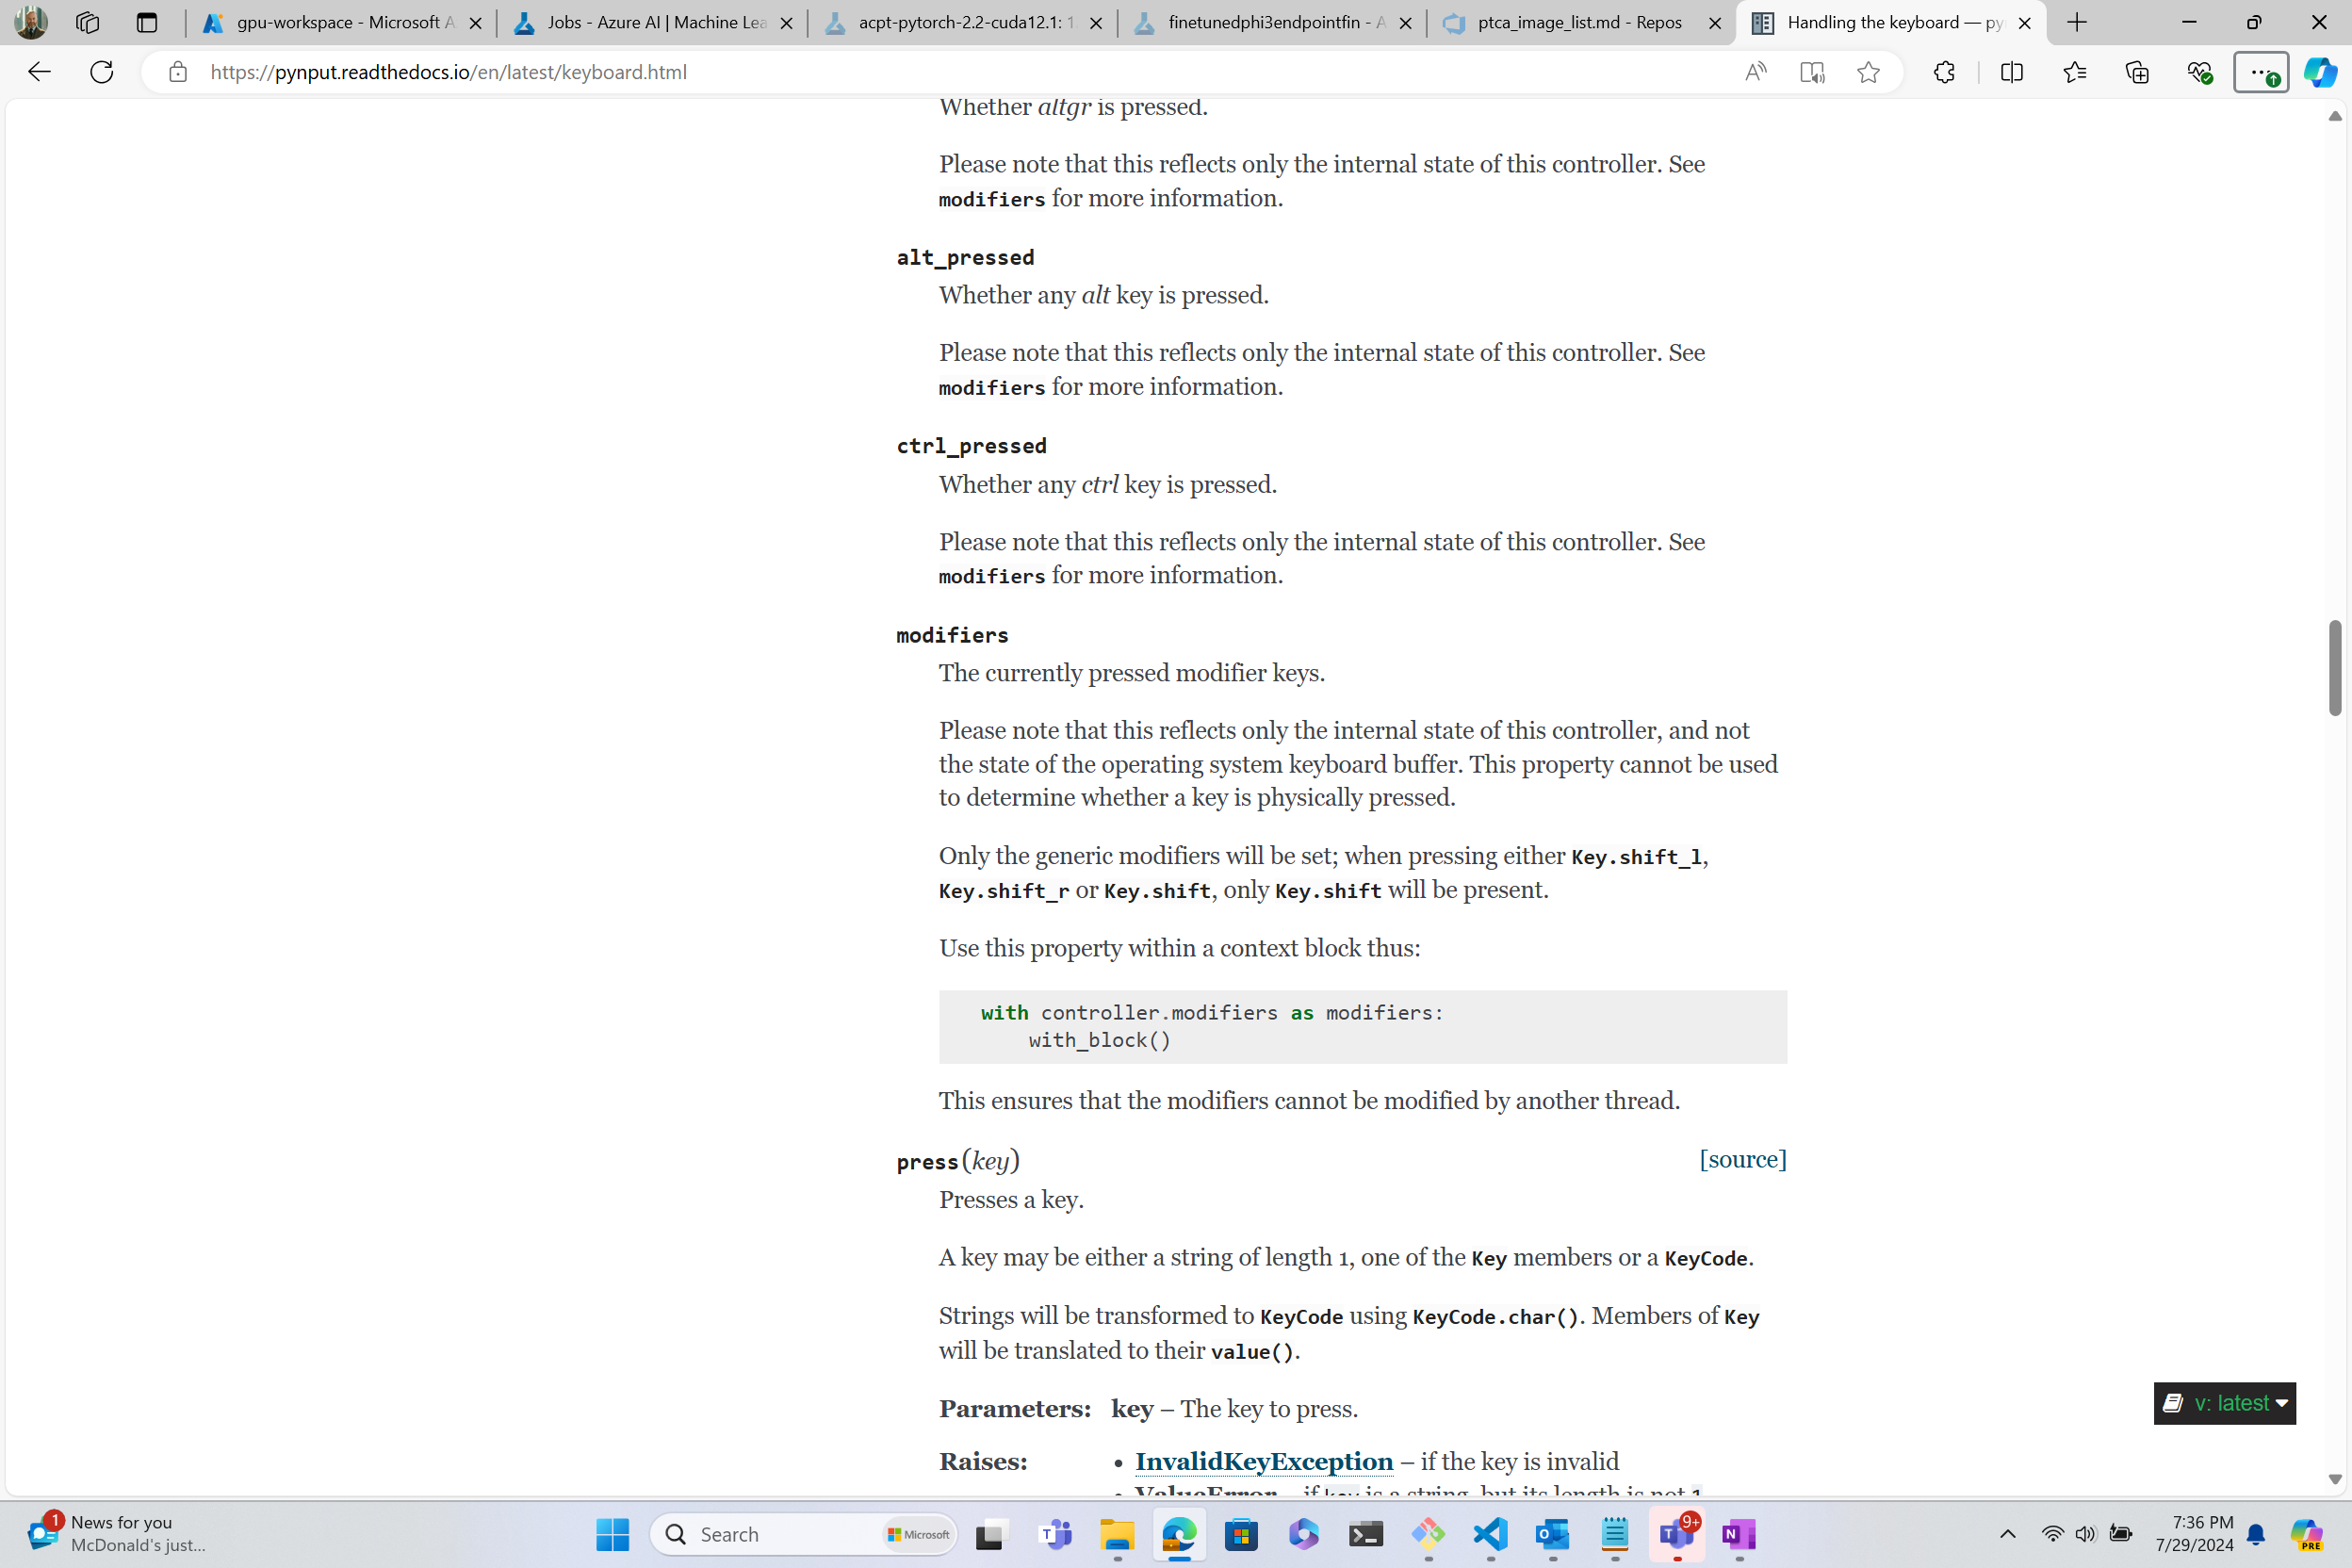
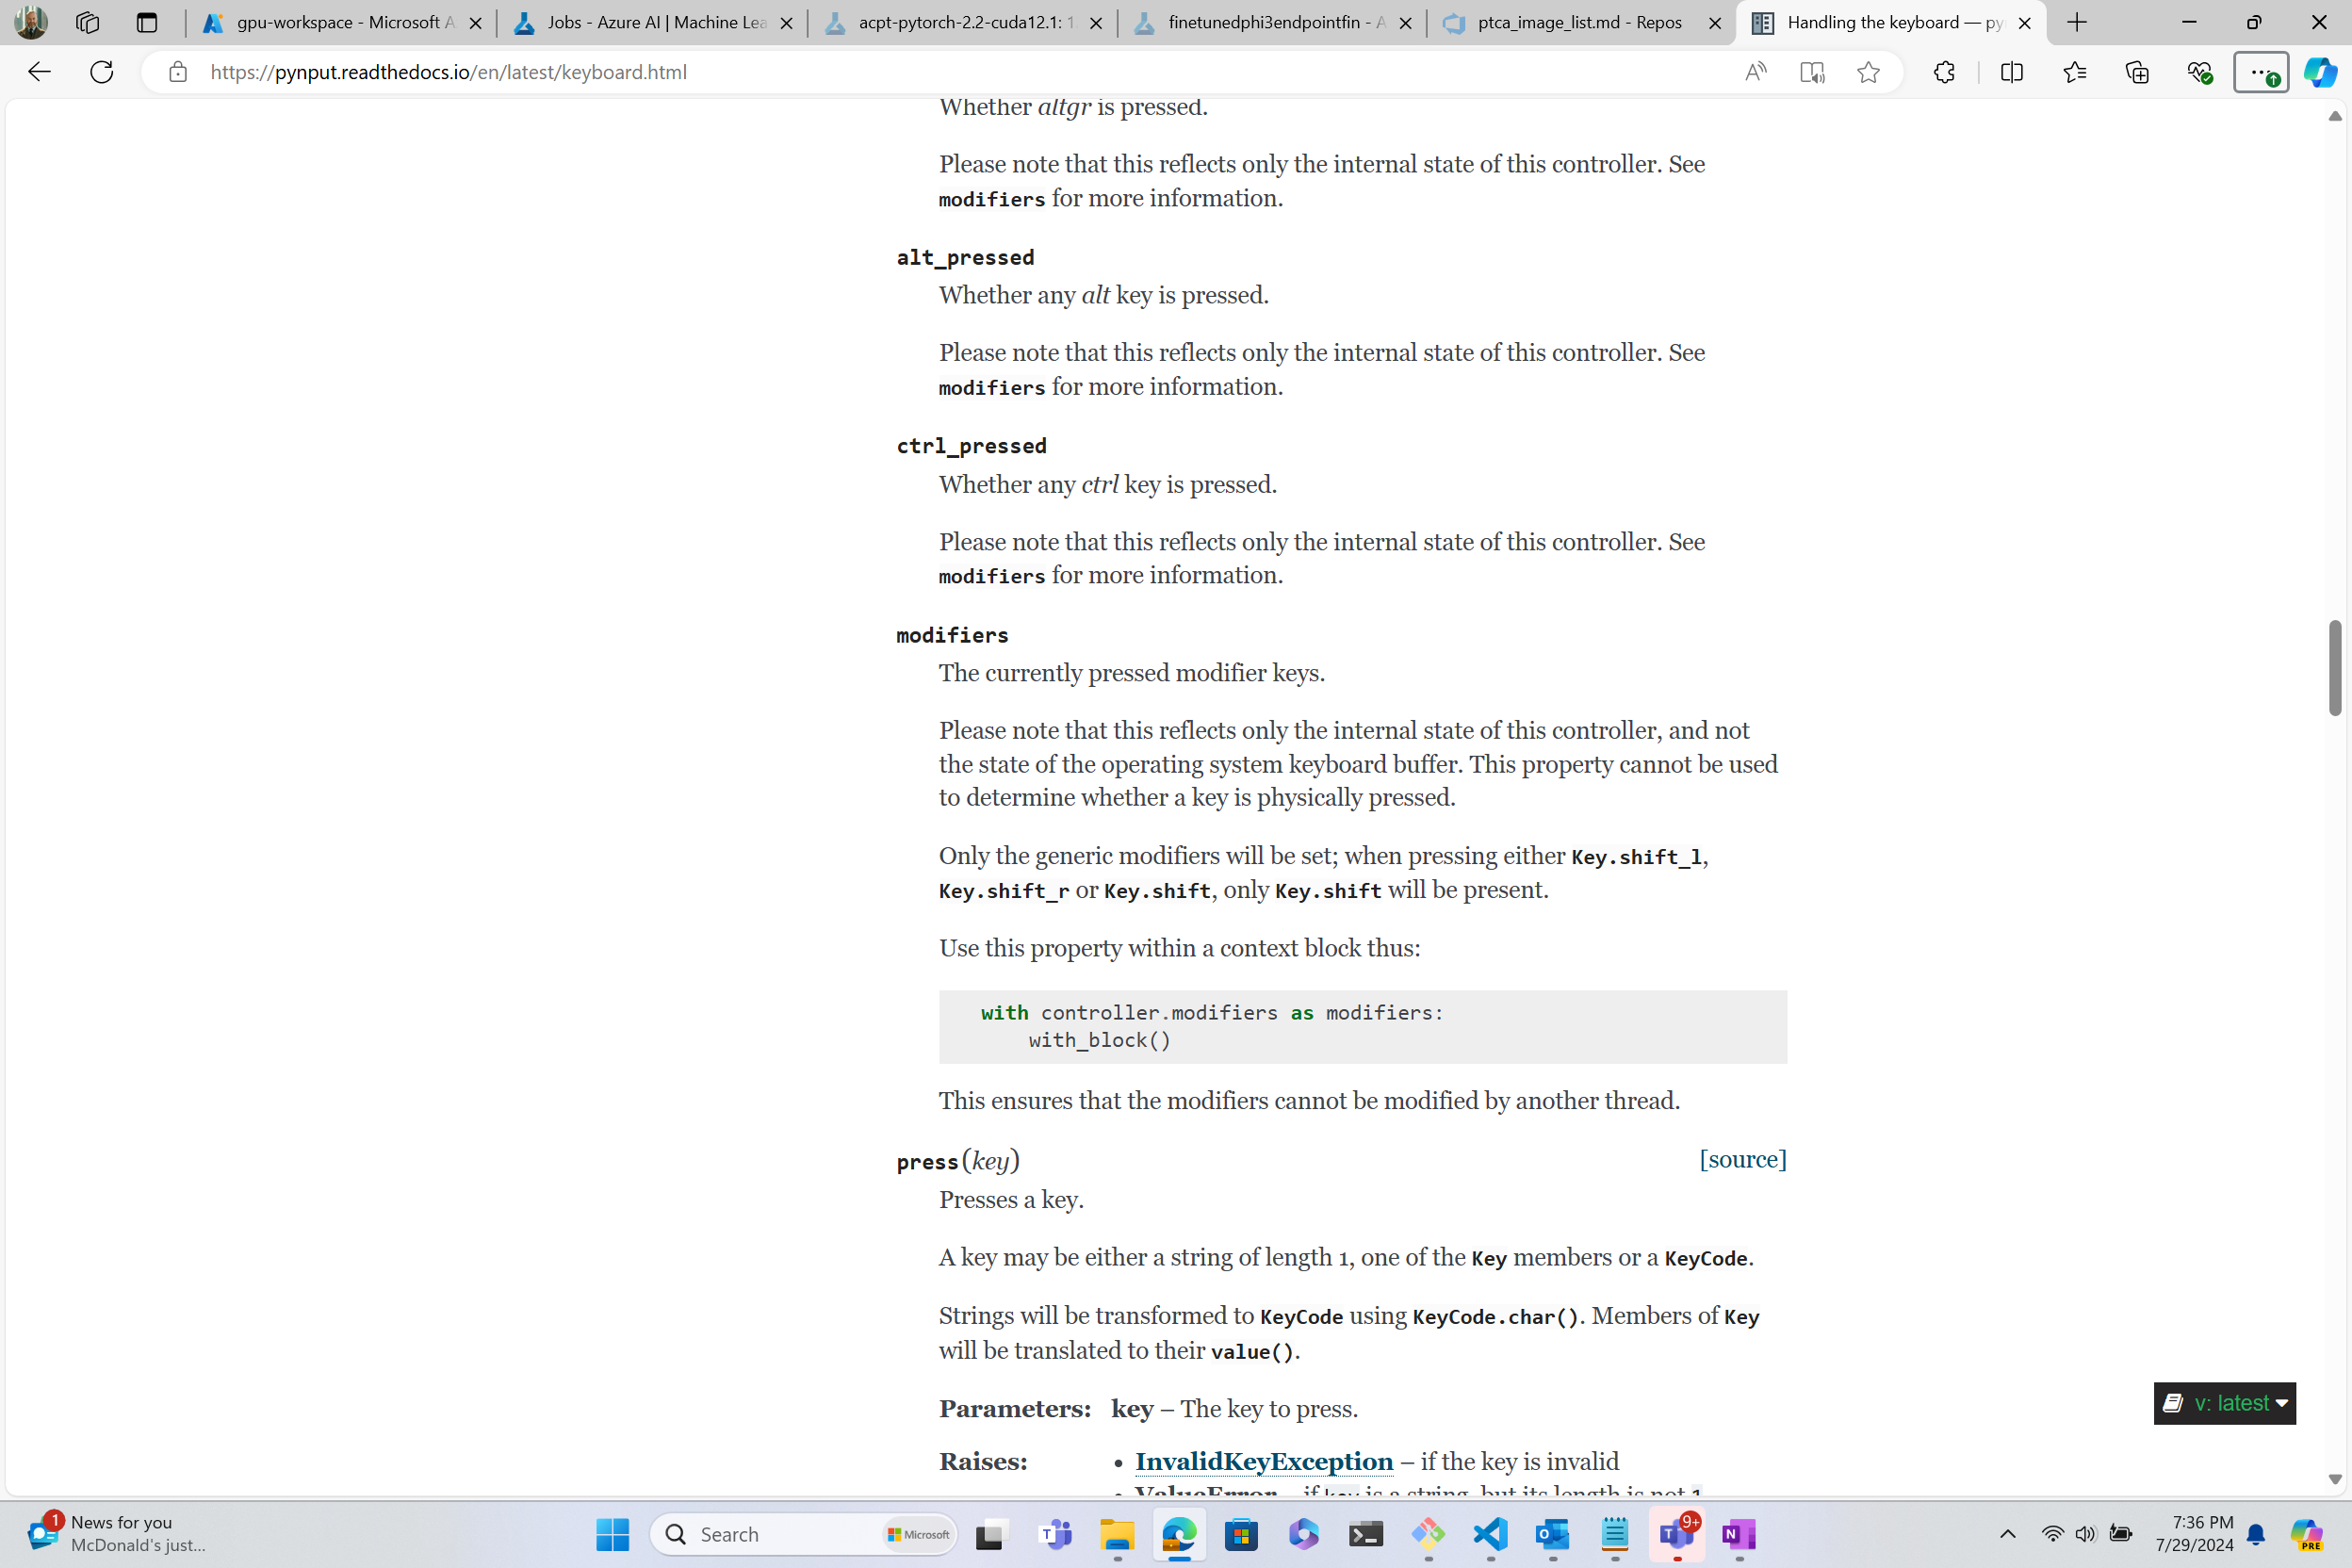

In [15]:
import winsound

def beep(frequency = 666, duration = 500):
    winsound.Beep(frequency, duration)

warning_time = 5

for i in range(warning_time):
    dur = 700 if i == warning_time-1 else 200

    beep(duration=dur)

    time.sleep(float(1000 - dur)/1000.0)

import base64

def encode_image(image_data):
    encoded_string = base64.b64encode(image_data).decode("utf8")
    image_file = 'data:image/jpeg;base64,' + encoded_string
    return image_file

for i in range(5):
    live_screenshot = capture_screenshot(".", "live")

    with open(live_screenshot, "rb") as image_file:
        image_file = encode_image(image_file.read())

        print(image_file)

        res = test_slm(prompt="You are an automation agent that controls keyboard and mouse on a computer screen.  What should be the next keyboard or mouse action?", 
                    image_url=image_file)

        res_js = json.loads(res.decode("utf-8"))[0]['0']
        while res_js.startswith("\\"):
            res_js = res_js[1:]

        while res_js.endswith("\\"):
            res_js = res_js[:-1]

        print("res_js::", res_js)
        beep(duration=100, frequency=555)
        process_slm_response(res_js)
        time.sleep(3)

beep(duration=1000, frequency=900)